<a href="https://colab.research.google.com/github/usm1ai/Accident_Prediction/blob/main/Accident_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('/content/drive/MyDrive/Accident Prediction/accident_data_v1.0.0_2023.db')
cursor = conn.cursor()

# Get all the tables in the database
tables = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

# Print the table names
for table in tables:
  print(table[0])

accident
casualty
vehicle
lsoa


In [2]:
'''
Join accident, casualty, and vehicle tables on accident_index.
Then join the resultant table with lsoa using lsoa_of_accident_location
and lsoa01cd
'''

joined_table = pd.read_sql_query("""
SELECT *
FROM accident
INNER JOIN casualty ON accident.accident_index = casualty.accident_index
INNER JOIN vehicle ON accident.accident_index = vehicle.accident_index
INNER JOIN lsoa ON accident.lsoa_of_accident_location = lsoa.lsoa01cd
WHERE accident.accident_year = 2020
""", conn)

# Print the joined table
# print(joined_table.head())

conn.close()


In [3]:
# Delete duplicate columns
joined_table = joined_table.loc[:,~joined_table.columns.duplicated()]


In [4]:
joined_table

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,generic_make_model,driver_imd_decile,driver_home_area_type,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,AUDI Q5,4,1,4576,E01004576,Wandsworth 013D,Wandsworth 013D,4.456251e+05,4486.701130,c7ddebfb-d730-4be6-b67e-938adb21309e
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,AUDI A1,7,1,3034,E01003034,Lambeth 012A,Lambeth 012A,1.146984e+05,1719.140860,cb2e7f50-252f-469e-9b13-a56794f5d5d6
2,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,AUDI A1,7,1,3034,E01003034,Lambeth 012A,Lambeth 012A,1.146984e+05,1719.140860,cb2e7f50-252f-469e-9b13-a56794f5d5d6
3,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,-1,-1,-1,4726,E01004726,Westminster 003C,Westminster 003C,1.857269e+05,2698.692831,e5cccc5e-7d0c-4f89-82c3-2a5d03b1ae18
4,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,TOYOTA PRIUS,2,1,3617,E01003617,Newham 012B,Newham 012B,2.326906e+05,3013.438191,3e1979c9-8863-4982-afa5-7a6de00635d7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,...,AUDI A3,6,3,32966,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef
201939,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,...,FORD FOCUS,6,3,32966,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef
201940,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,...,MITSUBISHI SHOGUN,7,3,32966,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef
201941,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,...,BMW 3 SERIES,6,2,32966,W01000484,Powys 011E,Powys 011E,1.535530e+08,81092.977857,629864d0-e8b8-41a9-aa65-d8ea28fc6eef


In [5]:
# # Save file as csv
# joined_table.to_csv('/content/drive/MyDrive/Accident Prediction/joined_table_.csv', index=False)

In [6]:
def time_of_the_day_analysis(time_pred):
  time_pred = pd.DataFrame(time_pred.str.split(':').str[0].astype(int))
  # Count occurrences of accidents for each hour
  hourly_accidents = time_pred.value_counts().sort_index()

  # Plotting
  plt.figure(figsize=(10, 6))
  hourly_accidents.plot(kind='bar', color='skyblue')
  plt.title('Accidents by Hour of the Day')
  plt.xlabel('Hour')
  plt.ylabel('Number of Accidents')

  # Set the x-axis tick labels
  plt.xticks(range(24), range(0, 24))  # Assuming 24 hours, starting from 1
  plt.xticks(rotation=0)  # Rotate x-axis labels if needed

  plt.grid(axis='y', linestyle='--', alpha=0.7)
  # plt.savefig('/content/drive/MyDrive/Accident Prediction/accidents_by_hour.png')
  plt.show()

In [7]:
def day_of_the_week_analysis(day_pred):
  # Count occurrences of accidents for each hour
  days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
  daily_accidents = day_pred.value_counts().sort_index()

  # Plotting
  plt.figure(figsize=(10, 6))
  daily_accidents.plot(kind='bar', color='skyblue')
  plt.title('Accidents by Day of the Week')
  plt.xlabel('Day')
  plt.ylabel('Number of Accidents')

  # Set the x-axis tick labels
  # plt.xticks(range(7), range(0, 7))
  plt.xticks(range(7), days)
  plt.xticks(rotation=0)  # Rotate x-axis labels if needed

  plt.grid(axis='y', linestyle='--', alpha=0.7)
  # plt.savefig('/content/drive/MyDrive/Accident Prediction/accidents_by_day.png')
  plt.show()


In [8]:
t = joined_table['time'].copy()

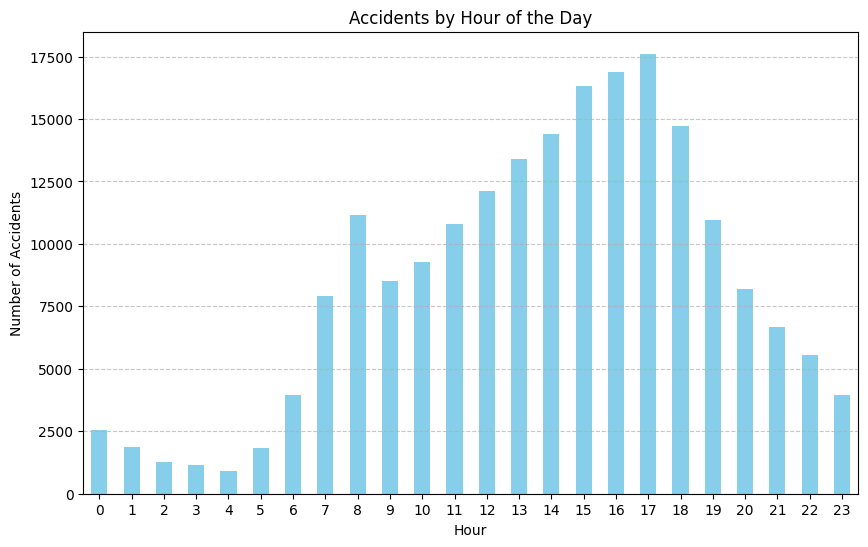

In [9]:
time_of_the_day_analysis(t)

In [10]:
d = joined_table['day_of_week'].copy()

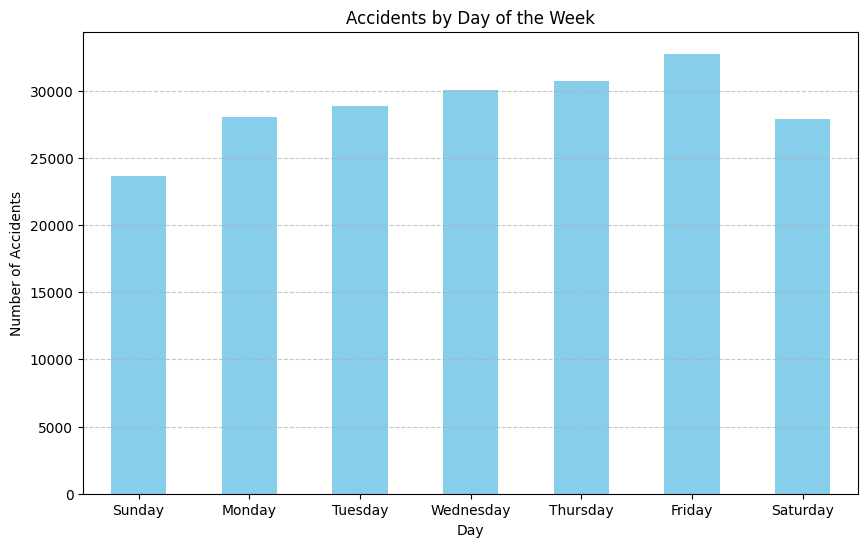

In [11]:
day_of_the_week_analysis(d)

In [12]:
# For Motorcycles

In [13]:
'''
Filter rows where vehicle_type is 2, 3, 4, or 5

2 --> 50CC or under
3 --> 50CC to 125CC
4 --> 125CC to 500CC
5 --> Above 500CC

'''

filtered_table = joined_table[joined_table['vehicle_type'].isin([2, 3, 4, 5])]
# Select only the columns of interest
filtered_data = filtered_table[['vehicle_type', 'time', 'day_of_week']].reset_index(drop=True)
# Display the filtered data
filtered_data

,vehicle_type,time,day_of_week
0,3,03:25,4
1,2,08:00,4
2,3,14:00,4
3,3,14:37,4
4,3,19:05,4
...,...,...,...
14306,5,12:27,1
14307,5,12:27,1
14308,5,15:05,1
14309,5,17:00,6


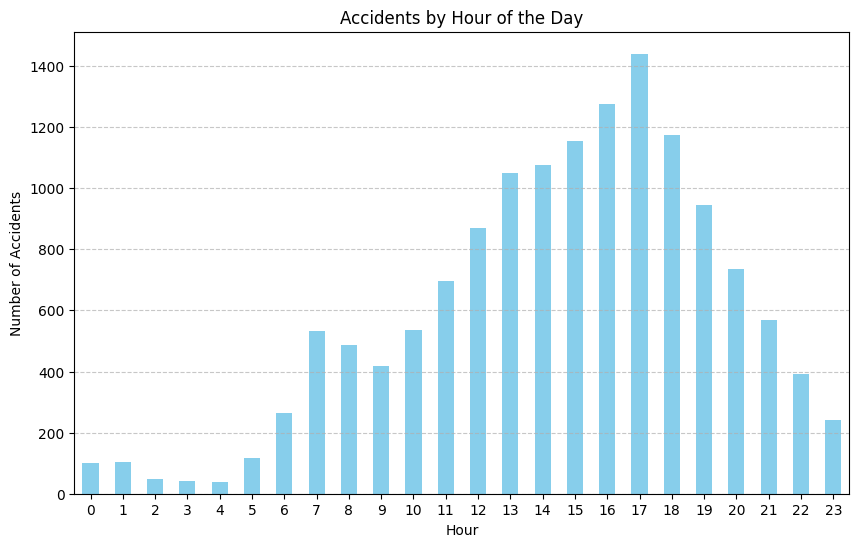

In [14]:
time_of_the_day_analysis(filtered_data['time'])

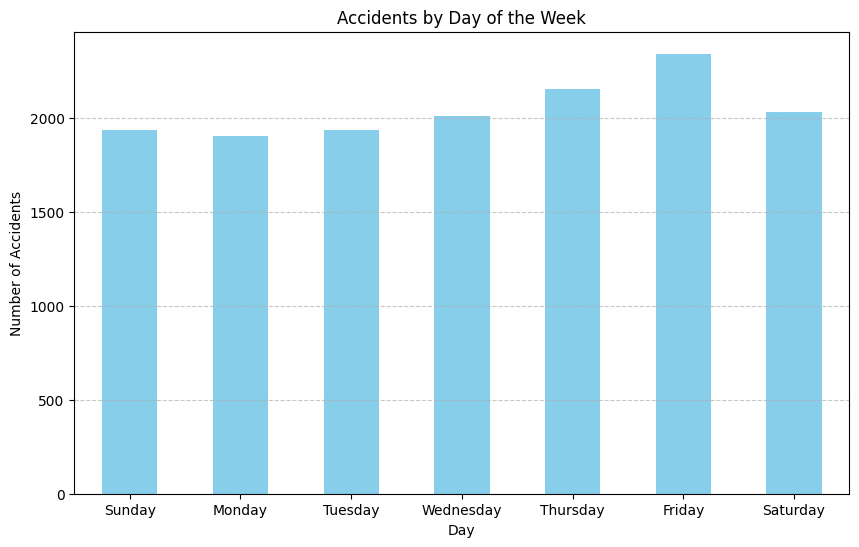

In [15]:
day_of_the_week_analysis(filtered_data['day_of_week'])

In [16]:
'''
Filter rows where pedestrian_location is not 0
'''

filtered_table = joined_table[joined_table['pedestrian_location'] !=0]
# Select only the columns of interest
filtered_data = filtered_table[['pedestrian_location', 'time', 'day_of_week']].reset_index(drop=True)
# Display the filtered data
filtered_data

,pedestrian_location,time,day_of_week
0,9,09:00,3
1,1,13:55,2
2,1,13:55,2
3,5,01:25,4
4,4,01:50,4
...,...,...,...
14207,1,15:30,2
14208,5,16:50,5
14209,5,08:30,4
14210,9,15:25,5


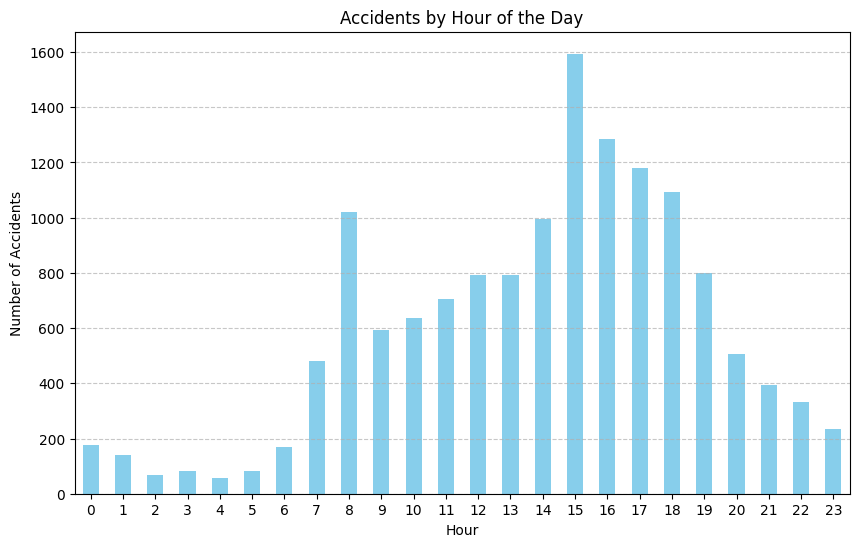

In [17]:
time_of_the_day_analysis(filtered_data['time'])

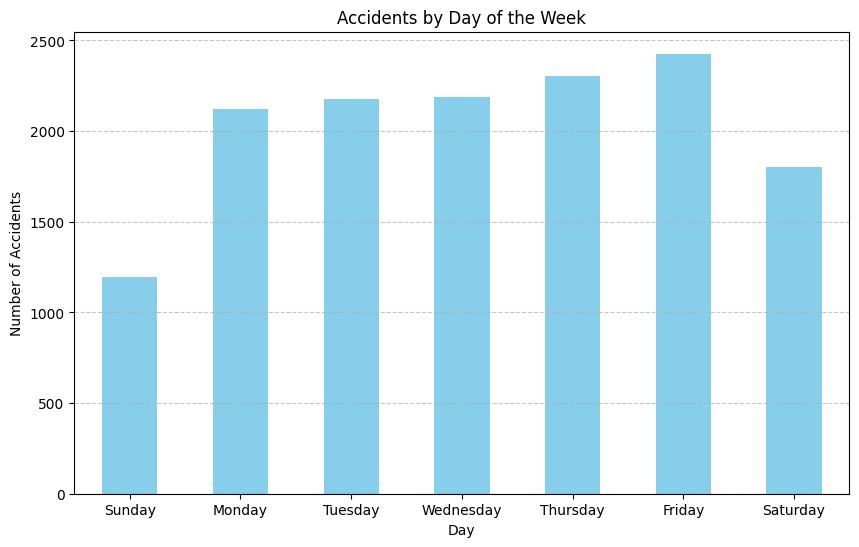

In [18]:
day_of_the_week_analysis(filtered_data['day_of_week'])

In [19]:
severity_data = joined_table[['accident_severity', 'time', 'day_of_week']]
severity_data

,accident_severity,time,day_of_week
0,3,09:00,3
1,3,13:55,2
2,3,13:55,2
3,3,01:25,4
4,2,01:50,4
...,...,...,...
201938,1,17:30,7
201939,1,17:30,7
201940,1,17:30,7
201941,1,17:30,7


In [20]:
severity_data['time'] = severity_data['time'].str.split(':').str[0].astype(int)

<ipython-input-20-f4216fb04575>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severity_data['time'] = severity_data['time'].str.split(':').str[0].astype(int)


,accident_severity,time,day_of_week
0,3,9,3
1,3,13,2
2,3,13,2
3,3,1,4
4,2,1,4
...,...,...,...
201938,1,17,7
201939,1,17,7
201940,1,17,7
201941,1,17,7


In [21]:
severity_data

,accident_severity,time,day_of_week
0,3,9,3
1,3,13,2
2,3,13,2
3,3,1,4
4,2,1,4
...,...,...,...
201938,1,17,7
201939,1,17,7
201940,1,17,7
201941,1,17,7


In [23]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

# Assuming your DataFrame containing the extracted columns is named df_accidents

# Convert time and day_of_week to categorical variables
severity_data['time'] = severity_data['time'].astype('category')
severity_data['day_of_week'] = severity_data['day_of_week'].astype('category')

# Convert categorical variables to one-hot encoded format
df_encoded = pd.get_dummies(severity_data[['time', 'day_of_week']])

# Convert accident_severity to binary columns
severity_dummies = pd.get_dummies(severity_data['accident_severity'], prefix='severity')

# Concatenate binary severity columns
df_encoded = pd.concat([df_encoded, severity_dummies], axis=1)

# Find frequent itemsets with minimum support threshold
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
     support                     itemsets
0   0.116939              (day_of_week_1)
1   0.138935              (day_of_week_2)
2   0.142961              (day_of_week_3)
3   0.148695              (day_of_week_4)
4   0.152221              (day_of_week_5)
5   0.162140              (day_of_week_6)
6   0.138108              (day_of_week_7)
7   0.199140                 (severity_2)
8   0.782676                 (severity_3)
9   0.110323  (day_of_week_2, severity_3)
10  0.113497  (severity_3, day_of_week_3)
11  0.117652  (day_of_week_4, severity_3)
12  0.119316  (day_of_week_5, severity_3)
13  0.128021  (severity_3, day_of_week_6)
14  0.105663  (day_of_week_7, severity_3)

Association Rules:
       antecedents   consequents  antecedent support  consequent support  \
0  (day_of_week_2)  (severity_3)            0.138935            0.782676   
1  (day_of_week_3)  (severity_3)            0.142961            0.782676   
2  (day_of_week_4)  (severity_3)            0.148695         

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-23-de8ebd3d821c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severity_data['time'] = severity_data['time'].astype('category')
<ipython-input-23-de8ebd3d821c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [24]:
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.116939,(day_of_week_1)
1,0.138935,(day_of_week_2)
2,0.142961,(day_of_week_3)
3,0.148695,(day_of_week_4)
4,0.152221,(day_of_week_5)
5,0.162140,(day_of_week_6)
6,0.138108,(day_of_week_7)
7,0.199140,(severity_2)
8,0.782676,(severity_3)
9,0.110323,"(day_of_week_2, severity_3)"


In [25]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(day_of_week_2),(severity_3),0.138935,0.782676,0.110323,0.794062,1.014547,0.001582,1.055287,0.016652
1,(day_of_week_3),(severity_3),0.142961,0.782676,0.113497,0.793904,1.014345,0.001605,1.054477,0.016501
2,(day_of_week_4),(severity_3),0.148695,0.782676,0.117652,0.791228,1.010926,0.001272,1.040963,0.012696
3,(day_of_week_5),(severity_3),0.152221,0.782676,0.119316,0.783832,1.001477,0.000176,1.005347,0.001739
4,(day_of_week_6),(severity_3),0.162140,0.782676,0.128021,0.789573,1.008812,0.001118,1.032776,0.010426
5,(day_of_week_7),(severity_3),0.138108,0.782676,0.105663,0.765077,0.977514,-0.002431,0.925085,-0.025995


In [26]:
# Assuming joined_table is your DataFrame

# Check if the two columns are identical
are_identical = joined_table['lsoa01nmw'].equals(joined_table['lsoa01nm'])

# Print the result
if are_identical:
    print("The columns 'lsoa01nmw' and 'lsoa01nm' are identical.")
else:
    print("The columns 'lsoa01nmw' and 'lsoa01nm' are not identical.")


The columns 'lsoa01nmw' and 'lsoa01nm' are not identical.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# Define the list of region substrings
regions = ['Kingston upon Hull', 'East Riding of Yorkshire', 'North Lincolnshire', 'North East Lincolnshire']

# Filter rows where 'lsoa01nm' contains any of the region substrings
filtered_table = joined_table[joined_table['lsoa01nm'].str.contains('|'.join(regions))]

# Select only the columns of interest
filtered_data = filtered_table[['longitude', 'latitude', 'lsoa01nm']].reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
filtered_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,longitude,latitude,lsoa01nm
0,-0.393424,53.744936,Kingston upon Hull 028E
1,-0.393424,53.744936,Kingston upon Hull 028E
2,-0.528743,53.512895,North Lincolnshire 022C
3,-0.324858,53.791630,Kingston upon Hull 002E
4,-0.095008,53.574501,North East Lincolnshire 003C
...,...,...,...
3980,-0.703181,53.569801,North Lincolnshire 005A
3981,-0.703181,53.569801,North Lincolnshire 005A
3982,-0.703181,53.569801,North Lincolnshire 005A
3983,-0.342063,53.742609,Kingston upon Hull 029C


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


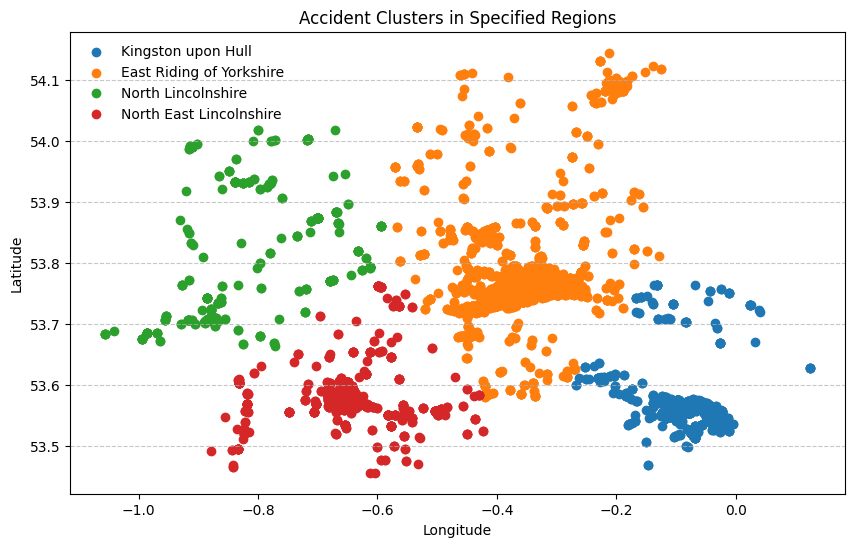

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming filtered_data contains the extracted data

# Define the number of clusters
num_clusters = 4

# Select longitude and latitude columns for clustering
X = filtered_data[['longitude', 'latitude']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
filtered_data['cluster'] = kmeans.labels_

# Define region names
regions = ['Kingston upon Hull', 'East Riding of Yorkshire', 'North Lincolnshire', 'North East Lincolnshire']

# Create a dictionary to map cluster labels to region names
cluster_region_map = {cluster_label: region for cluster_label, region in zip(range(num_clusters), regions)}

# Map cluster labels to region names
filtered_data['region'] = filtered_data['cluster'].map(cluster_region_map)

# Plot the clusters
plt.figure(figsize=(10, 6))
for region in regions:
    region_data = filtered_data[filtered_data['region'] == region]
    plt.scatter(region_data['longitude'], region_data['latitude'], label=region)

plt.title('Accident Clusters in Specified Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
